<a href="https://colab.research.google.com/github/megha-66/Deep-Learning-Lab-works-/blob/main/Lab3_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Experimenting with different learning rates while training  Resnet50 model architecture

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Resize images to 32x32
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to create a model with a specified learning rate
def create_model(learning_rate, input_shape=(32, 32, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(3, (3, 3), padding='same', input_shape=input_shape))
    model.add(ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define different learning rates to test
learning_rates = [0.001, 0.01, 0.1]

# Train and evaluate the model with different learning rates
results = {}
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = create_model(learning_rate=lr)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32, verbose=1)
    score = model.evaluate(x_test, y_test, verbose=0)
    results[lr] = score[1]  # Collect the test accuracy

# Print results
for lr, accuracy in results.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {accuracy}")


Training with learning rate: 0.001
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 36ms/step - accuracy: 0.8040 - loss: 0.7844 - val_accuracy: 0.9414 - val_loss: 0.2629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 109s 29ms/step - accuracy: 0.9530 - loss: 0.2114 - val_accuracy: 0.9388 - val_loss: 0.2402
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9626 - loss: 0.1755 - val_accuracy: 0.9147 - val_loss: 0.3389
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9274 - loss: 0.2833 - val_accuracy: 0.9676 - val_loss: 0.1187
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9697 - loss: 0.1456 - val_accuracy: 0.9720 - val_loss: 0.1013
Training with learning rate: 0.01
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 115s 35ms/step - accuracy: 0.1083 - loss: 3.4797 - val_accuracy: 0.1228 - val_loss: 2.3486
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 30ms/step - accuracy: 0.1076 - loss: 2.3026 - val_accuracy: 0.1222 - val_loss: 2.3427
Epoch 3/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,856 (91.99 MB)

 Trainable params: 24,061,736 (91.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 123s 33ms/step - accuracy: 0.7626 - loss: 0.8615 - val_accuracy: 0.6331 - val_loss: 3.0699
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 30ms/step - accuracy: 0.9365 - loss: 0.2596 - val_accuracy: 0.9825 - val_loss: 0.0760
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9592 - loss: 0.1872 - val_accuracy: 0.9824 - val_loss: 0.0774


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,616 (56.64 MB)

 Trainable params: 14,848,616 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.1121 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 36ms/step - accuracy: 0.1135 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.1120 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3011


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 1, 1, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,302,504 (27.86 MB)

 Trainable params: 7,218,856 (27.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 216s 47ms/step - accuracy: 0.8872 - loss: 0.3791 - val_accuracy: 0.9792 - val_loss: 0.0781
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 35ms/step - accuracy: 0.9755 - loss: 0.0977 - val_accuracy: 0.9753 - val_loss: 0.0785
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9794 - loss: 0.0797 - val_accuracy: 0.9756 - val_loss: 0.0833
ResNet50 Test Accuracy: 0.9824000000953674
VGG16 Test Accuracy: 0.11349999904632568
DenseNet121 Test Accuracy: 0.975600004196167


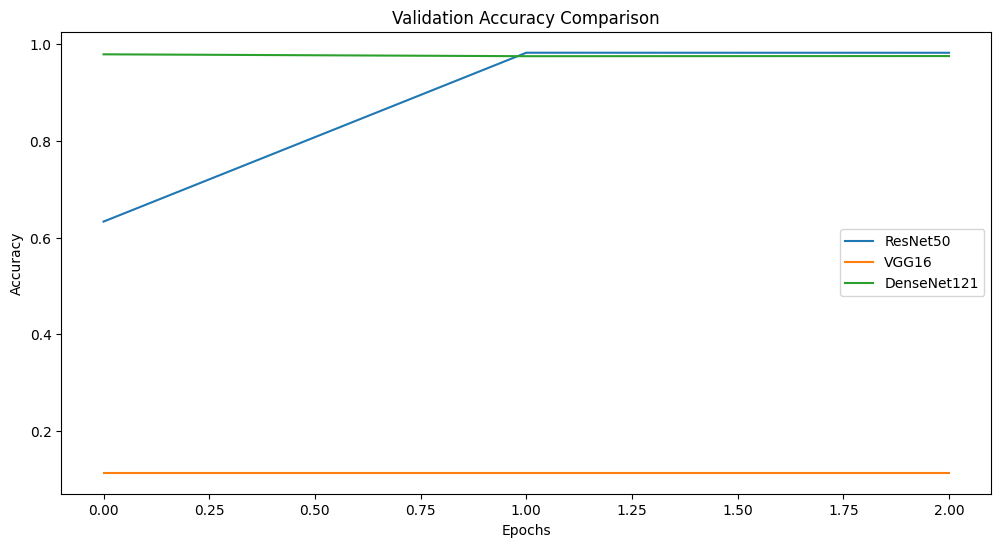

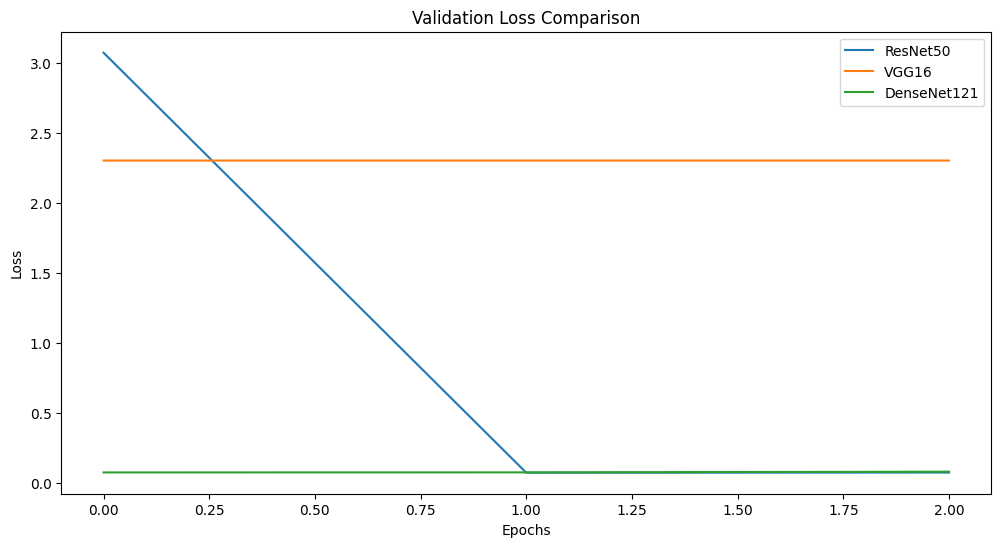

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, VGG16, DenseNet121
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Resize images to 32x32
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))




# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to create a model using a specified base architecture
def create_model(base_model, input_shape=(32, 32, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(3, (3, 3), padding='same', input_shape=input_shape))  # Add a Conv2D layer to match input shape
    model.add(base_model(weights=None, include_top=False, input_shape=(32, 32, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ResNet50 Model
resnet_model = create_model(ResNet50)
resnet_model.summary()
resnet_history = resnet_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=32)

# VGG16 Model
vgg_model = create_model(VGG16)
vgg_model.summary()
vgg_history = vgg_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=32)

# DenseNet121 Model
densenet_model = create_model(DenseNet121)
densenet_model.summary()
densenet_history = densenet_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=32)

# Evaluate the models on the test data
resnet_score = resnet_model.evaluate(x_test, y_test, verbose=0)
vgg_score = vgg_model.evaluate(x_test, y_test, verbose=0)
densenet_score = densenet_model.evaluate(x_test, y_test, verbose=0)

print(f"ResNet50 Test Accuracy: {resnet_score[1]}")
print(f"VGG16 Test Accuracy: {vgg_score[1]}")
print(f"DenseNet121 Test Accuracy: {densenet_score[1]}")

# Compare the performance
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(resnet_history.history['val_accuracy'], label='ResNet50')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16')
plt.plot(densenet_history.history['val_accuracy'], label='DenseNet121')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(resnet_history.history['val_loss'], label='ResNet50')
plt.plot(vgg_history.history['val_loss'], label='VGG16')
plt.plot(densenet_history.history['val_loss'], label='DenseNet121')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


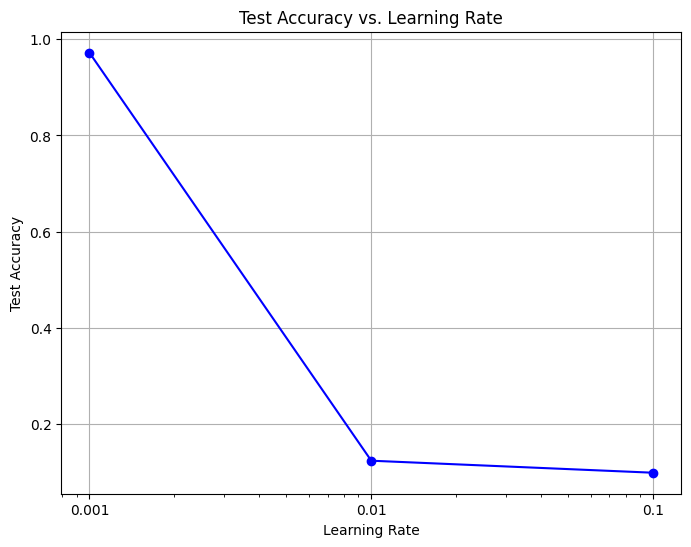

In [ ]:
import matplotlib.pyplot as plt

# Results from different learning rates
learning_rates = [0.001, 0.01, 0.1]
accuracies = [results[lr] for lr in learning_rates]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Test Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.xticks(learning_rates, [str(lr) for lr in learning_rates])
plt.grid(True)
plt.show()


Training with activation function: relu
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 33ms/step - accuracy: 0.7632 - loss: 0.8677 - val_accuracy: 0.9306 - val_loss: 0.2928
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 30ms/step - accuracy: 0.9466 - loss: 0.2348 - val_accuracy: 0.9703 - val_loss: 0.1114
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9584 - loss: 0.1896 - val_accuracy: 0.9814 - val_loss: 0.0769
Training with activation function: tanh
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 33ms/step - accuracy: 0.7746 - loss: 0.8398 - val_accuracy: 0.9595 - val_loss: 0.1900
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9486 - loss: 0.2347 - val_accuracy: 0.9241 - val_loss: 0.3312
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9576 - loss: 0.1971 - val_accuracy: 0.9721 - val_loss: 0.1195
Training with activation function: sigmoid
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 32ms/step - accuracy: 0.8388 - loss: 0.559

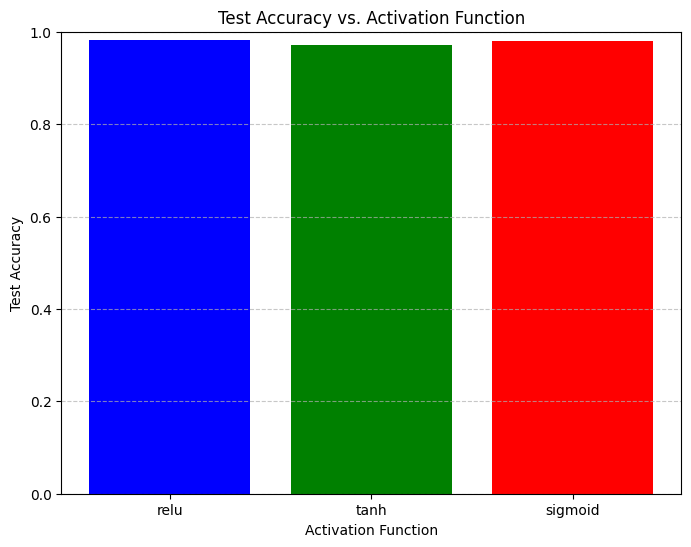

In [ ]:
#Experimenting the training of Resnet50 model with different activation functions

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Resize images to 32x32
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to create a model with a specified activation function
def create_model(activation_function, input_shape=(32, 32, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(3, (3, 3), padding='same', input_shape=input_shape))
    model.add(ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=activation_function))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))


    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define activation functions to test
activation_functions = ['relu', 'tanh', 'sigmoid']

# Train and evaluate the model with different activation functions
results = {}
for activation in activation_functions:
    print(f"Training with activation function: {activation}")
    model = create_model(activation_function=activation)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=32, verbose=1)
    score = model.evaluate(x_test, y_test, verbose=0)
    results[activation] = score[1]  # Collect the test accuracy

# Print results
for activation, accuracy in results.items():
    print(f"Activation Function: {activation}, Test Accuracy: {accuracy}")



import matplotlib.pyplot as plt

# Results from different activation functions
activation_functions = ['relu', 'tanh', 'sigmoid']
accuracies = [results[activation] for activation in activation_functions]

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(activation_functions, accuracies, color=['b', 'g', 'r'])
plt.title('Test Accuracy vs. Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.ylim([0, 1])  # Set y-axis limits from 0 to 1 for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np



# Make predictions on the test set
resnet_predictions = np.argmax(resnet_model.predict(x_test), axis=-1)
vgg_predictions = np.argmax(vgg_model.predict(x_test), axis=-1)
densenet_predictions = np.argmax(densenet_model.predict(x_test), axis=-1)

# Convert one-hot encoded labels back to integers
y_test_labels = np.argmax(y_test, axis=-1)

# Calculate metrics for ResNet50
print("ResNet50 Performance:")
print(classification_report(y_test_labels, resnet_predictions))
print("Accuracy:", accuracy_score(y_test_labels, resnet_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, resnet_predictions))

# Calculate metrics for VGG16
print("\nVGG16 Performance:")
print(classification_report(y_test_labels, vgg_predictions))
print("Accuracy:", accuracy_score(y_test_labels, vgg_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, vgg_predictions))

# Calculate metrics for DenseNet121
print("\nDenseNet121 Performance:")
print(classification_report(y_test_labels, densenet_predictions))
print("Accuracy:", accuracy_score(y_test_labels, densenet_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, densenet_predictions))



313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step
ResNet50 Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.99      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 0.9824
Confusion Matrix:
 [[ 964    1    4    0    4    0    2    2    2    1]
 [  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
